In [1]:
from __future__ import division
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cmath
import time
import scipy.io.wavfile

    
def DFTloop(x,N):
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            s = s + x[n]*cmath.exp(complex(0,-(2*np.pi*k*n)/N))
        X.append(s)
    return (X)

def DFTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append(cmath.exp(complex(0,-(2*np.pi*k*n)/N)))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return (X)

def IDFTmat(X,N):
    W = []
    for n in range(N):
        w = []
        for k in range(N):
            w.append(cmath.exp(complex(0,(2*np.pi*k*n)/N)))
        W.append(w)
    W_ = np.array(W)/float(N)
    X_ = np.array(X)
    x = np.matmul(W_,X_)
    return (x)

    
N=4
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
print(x)  
X=DFTmat(x,N)

print(X)

ix=IDFTmat(X,N)
print(ix)

X=DFTloop(x,N)

print(X)
e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[(0.788762267367512+0.9969762972400351j), (0.47221968991440044+0.5005231318298883j), (0.6243773222908886+0.9117029174803463j), (0.5285132716875718+0.302716705596603j)]
[ 2.41387255+2.71191905j  0.36219137+0.14156696j  0.41240663+1.10543938j
 -0.03342148+0.0289798j ]
[0.78876227+0.9969763j  0.47221969+0.50052313j 0.62437732+0.91170292j
 0.52851327+0.30271671j]
[(2.413872551260373+2.711919052146873j), (0.36219137130990864+0.14156696153285997j), (0.41240662805642836+1.10543937729389j), (-0.03342148115666138+0.028979797986517508j)]
5.805433241586353


In [2]:
from __future__ import division
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cmath
import time

    
def DCTloop(x,N):
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            s = s + x[n]*np.cos(np.pi*k*(n+0.5)/N)
        X.append(s)
    return (X)

def DCTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append(np.cos(np.pi*k*(n+0.5)/N))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return (X)


def IDCTmat(X,N):
    W = []
    w = []
    for k in range(N):
        w = []
        w.append(0.5)
        for n in range(1,N,1):
            w.append(np.cos(np.pi*n*(k+0.5)/N))
        W.append(w)
    W_ = float(2)*np.array(W)/float(N)
    X_ = np.array(X)
    x = np.matmul(W_,X_)
    return (x)

    
N=4
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
print(x)
    
X=DCTmat(x,N)
print(X)

ix=IDCTmat(X,N)
print(ix)

e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[(0.8304151928280721+0.3522275313908235j), (0.45810310816920796+0.8898377914214302j), (0.19740614747271967+0.30101518104891645j), (0.677334662977326+0.9749433441459058j)]
[ 2.16325911+2.51802385j  0.24119238-0.34998174j  0.60262511+0.09639131j
 -0.1822712 -0.78230418j]
[0.83041519+0.35222753j 0.45810311+0.88983779j 0.19740615+0.30101518j
 0.67733466+0.97494334j]
8.257422656427357


In [3]:
def haarMatrix(N):
    # Allow only size n of power 2
    N = 2**np.ceil(np.log2(N))
    if N > 2:
        h = haarMatrix(N / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    h_i = np.sqrt(N/2)*np.kron(np.eye(len(h)), [1, -1])    
    # combine parts
    h = np.vstack((h_n, h_i))
    return (h)

def Haar(x,N):
    W = []
    W = haarMatrix(N)/float(2)
    x_ = np.array(x)
    X = np.matmul(W,x_)
    return (X)

def IHaar(x,N):
    W = []
    W = haarMatrix(N)
    W = float(2)*np.transpose(W)/float(N)
    x_ = np.array(x)
    X = np.matmul(W,x_)
    return (X)

N=8
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
    
print(x)
    
X=Haar(x,N)
print(X)

ix=IHaar(X,N)
print(ix)

e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[(0.7807725367185242+0.886024920905279j), (0.5739353905874168+0.9918476796971449j), (0.8967639737698205+0.941387764079617j), (0.5283517875512737+0.9678394924492191j), (0.45278425315440474+0.35341701028188877j), (0.6929399455402536+0.06319754746054251j), (0.8704056677316185+0.39296429941804767j), (0.4939950326907888+0.9334047168671549j)]
[ 2.64497429+2.76504172j  0.13484939+1.02205814j -0.04978586-0.02217109j
 -0.15462764-0.64329355j  0.20683715-0.10582276j  0.36841219-0.02645173j
 -0.24015569+0.29021946j  0.37641064-0.54044042j]
[0.78077254+0.88602492j 0.57393539+0.99184768j 0.89676397+0.94138776j
 0.52835179+0.96783949j 0.45278425+0.35341701j 0.69293995+0.06319755j
 0.87040567+0.3929643j  0.49399503+0.93340472j]
13.714923741878248


Text(0,0.5,'E(L)')

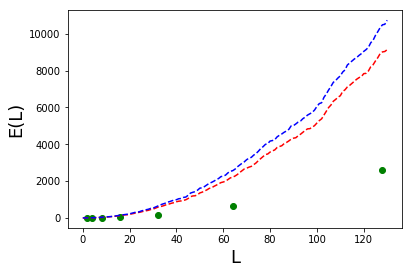

In [4]:
N=132
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
L= np.arange(N-1)
eX= np.zeros(N-1)
eY= np.zeros(N-1)
eZ= np.zeros(N-1)

for i in range(1,8,1):
    m=int(2**i)
    X=Haar(x[0:m],m)
    for j in range(0,m-1,1):
        eX[m]=eX[m]+np.abs(x[j]-X[j])**2

for i in range(1,N-1,1):
    Y=DCTmat(x[0:i],i)
    Z=DFTmat(x[0:i],i)
    for k in range(0,i-1,1):
        eY[i]=eY[i]+np.abs(x[k]-Y[k])**2
    for l in range(0,i-1,1):
        eZ[i]=eZ[i]+np.abs(x[l]-Z[l])**2
eX[eX==0]=np.nan

fig,ax = plt.subplots()
ax.plot(L,eX,'og-')
ax.plot(L,eY,'r--')
ax.plot(L,eZ,'b--')
ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('E(L)',fontsize = 18) 

Text(0,0.5,'E(L)')

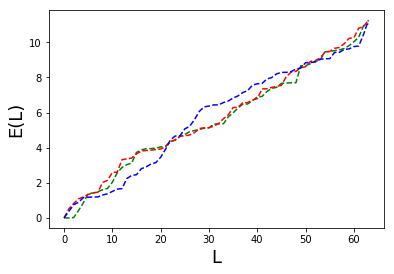

In [5]:
N=64
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
XDFT=DFTmat(x,N)
#print (XDFT)
XDCT=DCTmat(x,N)
XHaar=Haar(x,N)
XDFT_=DFTmat(x,N)
XDCT_=DCTmat(x,N)
XHaar_=Haar(x,N)
L= np.arange(N)
eX= np.zeros(N)
eY= np.zeros(N)
eZ= np.zeros(N)
for l in range(N):
    for i in range(int((N+1-l)/2),int((N-1+l)/2),1):
        XDFT[i]=0
    #print (XDFT)
    xdft=IDFTmat(XDFT,N)
    for j in range(N):
        eX[l]=eX[l]+np.abs(x[j]-xdft[j])**2
for l in range(N):
    for i in range(N-l,N,1):
        XDCT[i]=0
    xdct=IDCTmat(XDCT,N)
    for j in range(N):
        eY[l]=eY[l]+np.abs(x[j]-xdct[j])**2
for l in range(N):
    for i in range(N-l,N,1):
        XHaar[i]=0
    xhaar=IHaar(XHaar,N)
    for j in range(N):
        eZ[l]=eZ[l]+np.abs(x[j]-xhaar[j])**2
fig,ax = plt.subplots()
ax.plot(L,eX,'g--')
ax.plot(L,eY,'r--')
ax.plot(L,eZ,'b--')
ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('E(L)',fontsize = 18) 

Text(0,0.5,'E(L)')

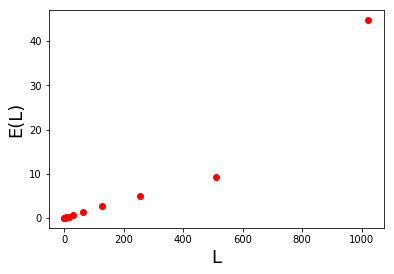

In [9]:
N=2048
[rate,data]=scipy.io.wavfile.read("audio1.wav")
signal=data[11000:13048]
x_real=signal[:,0]
x_img=signal[:,1]
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
XDCT=DCTmat(x,N)
XDCT_=DCTmat(x,N)
L= np.arange(N)
eY= np.zeros(N)
for l in range(0,int(np.log2(N)),1):
    l=(2**l)-1
    for i in range(N-l,N,1):
        XDCT[i]=0
    xdct=IDCTmat(XDCT,N)
    for j in range(N):
        eY[l]=eY[l]+np.abs(x[j]-xdct[j])**2
eY=(1.0/float(N))*eY
eY[eY==0]=np.nan
fig,ax = plt.subplots()
ax.plot(L,eY,'ro-')
ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('E(L)',fontsize = 18) 

Text(0,0.5,'E(M)')

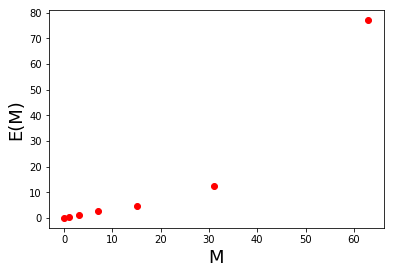

In [13]:
N=128
[rate,data]=scipy.io.wavfile.read("audio1.wav")
signal=data[11000:11128]
x_real=signal[:,0]
x_img=signal[:,1]
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
XDCT=DCTmat(x,N)
XDCT_real= []
XDCT_img= []
M= np.arange(N)
eY= np.zeros(N)
for l in range(0,int(np.log2(N)),1):
    l=(2**l)-1
    for m in range(l):
        XDCT_real.append(XDCT[l].real)
        XDCT_img.append(XDCT[l].imag)
    scipy.io.wavfile.write("audio2.wav",rate,np.column_stack((XDCT_real,XDCT_img))) #compressed file
    [rate2,data2]=scipy.io.wavfile.read("audio2.wav")
    signal2=data2[11000:11128]
    x_real2=signal2[:,0]
    x_img2=signal2[:,1]
    x2 = []
    for i in range(N):
        x2.append(complex(x_real2[i],x_img2[i]))
    for i in range(N-l,N,1):
        XDCT[i]=0
    xdct=IDCTmat(XDCT,N)
    for j in range(N):
        eY[l]=eY[l]+np.abs(x[j]-xdct[j])**2
    XDCT_real= []
    XDCT_img= []
eY=(1.0/float(N))*eY
eY[eY==0]=np.nan
fig,ax = plt.subplots()
ax.plot(M,eY,'ro-')
ax.set_xlabel('M',fontsize = 18)
ax.set_ylabel('E(M)',fontsize = 18) 